In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import ttest_ind
import math

from scipy.stats import pearsonr , spearmanr
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler ,MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [2]:
import os
os.chdir(r"C:\Users\ajibo\Desktop\DATA SCIENCE PROJECTS\Life Expectancy Dataset")
print(os.getcwd())

C:\Users\ajibo\Desktop\DATA SCIENCE PROJECTS\Life Expectancy Dataset


In [3]:
Expectancy = pd.read_csv(r"C:\Users\ajibo\Desktop\DATA SCIENCE PROJECTS\Life Expectancy Dataset\Data.csv")
Expectancy 

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,19.100,83,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,18.600,86,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,18.100,89,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,17.600,93,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,17.200,97,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.300,723.000,27,4.360,0.000,68.000,31,27.100,42,67.000,7.130,65.000,33.600,454.367,12777511.000,9.400,9.400,0.407,9.200
2934,Zimbabwe,2003,Developing,44.500,715.000,26,4.060,0.000,7.000,998,26.700,41,7.000,6.520,68.000,36.700,453.351,12633897.000,9.800,9.900,0.418,9.500
2935,Zimbabwe,2002,Developing,44.800,73.000,25,4.430,0.000,73.000,304,26.300,40,73.000,6.530,71.000,39.800,57.348,125525.000,1.200,1.300,0.427,10.000
2936,Zimbabwe,2001,Developing,45.300,686.000,25,1.720,0.000,76.000,529,25.900,39,76.000,6.160,75.000,42.100,548.587,12366165.000,1.600,1.700,0.427,9.800


In [4]:
Expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
pwd

'C:\\Users\\ajibo\\Desktop\\DATA SCIENCE PROJECTS\\Life Expectancy Dataset'

In [6]:
Expectancy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000,2928.000,2928.000,2938.000,2744.000,2938.000,2385.000,2938.000,2904.000,2938.000,2919.000,2712.000,2919.000,2938.000,2490.000,2286.000,2904.000,2904.000,2771.000,2775.000
mean,2007.519,69.225,164.796,30.304,4.603,738.251,80.940,2419.592,38.321,42.036,82.550,5.938,82.324,1.742,7483.158,12753375.120,4.840,4.870,0.628,11.993
std,4.614,9.524,124.292,117.927,4.052,1987.915,25.070,11467.272,20.044,160.446,23.428,2.498,23.717,5.078,14270.169,61012096.508,4.420,4.509,0.211,3.359
min,2000.000,36.300,1.000,0.000,0.010,0.000,1.000,0.000,1.000,0.000,3.000,0.370,2.000,0.100,1.681,34.000,0.100,0.100,0.000,0.000
25%,2004.000,63.100,74.000,0.000,0.877,4.685,77.000,0.000,19.300,0.000,78.000,4.260,78.000,0.100,463.936,195793.250,1.600,1.500,0.493,10.100
50%,2008.000,72.100,144.000,3.000,3.755,64.913,92.000,17.000,43.500,4.000,93.000,5.755,93.000,0.100,1766.948,1386542.000,3.300,3.300,0.677,12.300
75%,2012.000,75.700,228.000,22.000,7.703,441.534,97.000,360.250,56.200,28.000,97.000,7.492,97.000,0.800,5910.806,7420359.000,7.200,7.200,0.779,14.300
max,2015.000,89.000,723.000,1800.000,17.870,19479.912,99.000,212183.000,87.300,2500.000,99.000,17.600,99.000,50.600,119172.742,1293859294.000,27.700,28.600,0.948,20.700


In [7]:
Expectancy.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
Expectancy

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,19.100,83,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,18.600,86,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,18.100,89,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,17.600,93,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,17.200,97,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.300,723.000,27,4.360,0.000,68.000,31,27.100,42,67.000,7.130,65.000,33.600,454.367,12777511.000,9.400,9.400,0.407,9.200
2934,Zimbabwe,2003,Developing,44.500,715.000,26,4.060,0.000,7.000,998,26.700,41,7.000,6.520,68.000,36.700,453.351,12633897.000,9.800,9.900,0.418,9.500
2935,Zimbabwe,2002,Developing,44.800,73.000,25,4.430,0.000,73.000,304,26.300,40,73.000,6.530,71.000,39.800,57.348,125525.000,1.200,1.300,0.427,10.000
2936,Zimbabwe,2001,Developing,45.300,686.000,25,1.720,0.000,76.000,529,25.900,39,76.000,6.160,75.000,42.100,548.587,12366165.000,1.600,1.700,0.427,9.800


In [9]:
def clean_column_names(Expectancy):
    Expectancy.columns = Expectancy.columns.str.strip()  # Remove leading/trailing spaces
Expectancy.columns = Expectancy.columns.str.replace(' ', '_')  # Replace spaces with underscores
Expectancy.columns = Expectancy.columns.str.lower()  # Convert to lowercase

In [10]:
Expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy_                 2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles_                         2938 non-null   int64  
 10  _bmi_                            2904 non-null   float64
 11  under-five_deaths_               2938 non-null   int64  
 12  polio               

In [11]:
missing_per_country = Expectancy.groupby("country").apply(lambda x: x.isnull().sum().sum())
missing_per_country

country
Afghanistan                            0
Albania                                0
Algeria                                6
Angola                                 9
Antigua and Barbuda                   19
                                      ..
Venezuela (Bolivarian Republic of)    34
Viet Nam                              37
Yemen                                 34
Zambia                                 7
Zimbabwe                               2
Length: 193, dtype: int64

In [12]:
total_values_per_country = Expectancy.groupby("country").size() * Expectancy.shape[1]
total_values_per_country

country
Afghanistan                           352
Albania                               352
Algeria                               352
Angola                                352
Antigua and Barbuda                   352
                                     ... 
Venezuela (Bolivarian Republic of)    352
Viet Nam                              352
Yemen                                 352
Zambia                                352
Zimbabwe                              352
Length: 193, dtype: int64

In [13]:
missing_percentage = (missing_per_country / total_values_per_country) * 100
missing_percentage

country
Afghanistan                           0.000
Albania                               0.000
Algeria                               1.705
Angola                                2.557
Antigua and Barbuda                   5.398
                                      ...  
Venezuela (Bolivarian Republic of)    9.659
Viet Nam                             10.511
Yemen                                 9.659
Zambia                                1.989
Zimbabwe                              0.568
Length: 193, dtype: float64

In [14]:
missing_percentage_data = missing_percentage.reset_index()
missing_percentage_data.columns = ["country", "missing_percentage"]
missing_percentage_data

,country,missing_percentage
0,Afghanistan,0.000
1,Albania,0.000
2,Algeria,1.705
3,Angola,2.557
4,Antigua and Barbuda,5.398
...,...,...
188,Venezuela (Bolivarian Republic of),9.659
189,Viet Nam,10.511
190,Yemen,9.659
191,Zambia,1.989


In [15]:
missing_percentage_data = missing_percentage_data.sort_values(by="missing_percentage", ascending=False)

missing_percentage_data

,country,missing_percentage
110,Monaco,40.909
146,San Marino,36.364
159,South Sudan,34.659
38,Cook Islands,27.273
124,Niue,27.273
...,...,...
86,Kazakhstan,0.568
85,Jordan,0.568
82,Italy,0.568
1,Albania,0.000


In [16]:
# Group by "Country" and check for completely null columns
all_null_columns = Expectancy.groupby("country").apply(lambda x: x.isnull().all())

fully_missing_columns = {
        country: list(all_null_columns.columns[all_null_columns.loc[country]])
        for country in all_null_columns.index
        if all_null_columns.loc[country].any()
    }

missing_columns_data = pd.DataFrame(list(fully_missing_columns.items()), columns=["country", "fully_missing_columns"])

# Display result
missing_columns_data


,country,fully_missing_columns
0,Antigua and Barbuda,[population]
1,Bahamas,"[gdp, population]"
2,Bahrain,[population]
3,Barbados,[population]
4,Bolivia (Plurinational State of),"[gdp, population]"
5,Brunei Darussalam,[population]
6,Congo,"[gdp, population]"
7,Cook Islands,"[life_expectancy_, adult_mortality, gdp, popul..."
8,Cuba,[population]
9,Czechia,"[gdp, population, income_composition_of_resour..."


In [17]:
single_record_countries =  Expectancy.groupby("country").filter(lambda x: len(x) == 1)["country"].unique()
single_record_countries

array(['Cook Islands', 'Dominica', 'Marshall Islands', 'Monaco', 'Nauru',
       'Niue', 'Palau', 'Saint Kitts and Nevis', 'San Marino', 'Tuvalu'],
      dtype=object)

In [18]:
Expectancy.loc[Expectancy['country'].isin(single_record_countries)]


,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.010,0.000,98.000,0,82.800,0,98.000,3.580,98.000,0.100,NaN,NaN,0.100,0.100,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.010,11.420,96.000,0,58.400,0,96.000,5.580,96.000,0.100,722.757,NaN,2.700,2.600,0.721,12.700
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.010,871.878,8.000,0,81.600,0,79.000,17.240,79.000,0.100,3617.752,NaN,0.100,0.100,NaN,0.000
1715,Monaco,2013,Developing,NaN,NaN,0,0.010,0.000,99.000,0,NaN,0,99.000,4.300,99.000,0.100,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.010,15.607,87.000,0,87.300,0,87.000,4.650,87.000,0.100,136.183,NaN,0.100,0.100,NaN,9.600
1909,Niue,2013,Developing,NaN,NaN,0,0.010,0.000,99.000,0,77.300,0,99.000,7.200,99.000,0.100,NaN,NaN,0.100,0.100,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.691,99.000,0,83.300,0,99.000,9.270,99.000,0.100,1932.122,292.000,0.100,0.100,0.779,14.200
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.540,0.000,97.000,0,5.200,0,96.000,6.140,96.000,0.100,NaN,NaN,3.700,3.600,0.749,13.400
2216,San Marino,2013,Developing,NaN,NaN,0,0.010,0.000,69.000,0,NaN,0,69.000,6.500,69.000,0.100,NaN,NaN,NaN,NaN,NaN,15.100
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.010,78.281,9.000,0,79.300,0,9.000,16.610,9.000,0.100,3542.136,1819.000,0.200,0.100,NaN,0.000


In [19]:
Expectancy.columns

Index(['country', 'year', 'status', 'life_expectancy_', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles_', '_bmi_', 'under-five_deaths_', 'polio', 'total_expenditure', 'diphtheria_', '_hiv/aids', 'gdp', 'population', '_thinness__1-19_years', '_thinness_5-9_years', 'income_composition_of_resources', 'schooling'], dtype='object')

In [20]:
Expectancy.loc[:, "life_expectancy_"] = Expectancy.groupby("country")["life_expectancy_"].transform(lambda x: x.fillna(x.median()))
Expectancy.loc[:, "adult_mortality"] = Expectancy.groupby("country")["adult_mortality"].transform(lambda x: x.fillna(x.median()))
Expectancy.loc[:, "_bmi_"] = Expectancy.groupby("country")["_bmi_"].transform(lambda x: x.fillna(x.median()))

In [21]:
for col in ["polio", "diphtheria_", "hepatitis_b"]:
    Expectancy.loc[:, col] = Expectancy.groupby("country")[col].transform(
        lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x)
    )

In [22]:
for col in ["polio", "diphtheria_", "hepatitis_b"]:
    Expectancy.loc[:, col] = Expectancy.groupby("country")[col].transform(lambda x: x.interpolate(method='linear'))

In [23]:
Expectancy.dropna(inplace=True)


In [24]:
Expectancy.describe()

,year,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
count,1981.000,1981.000,1981.000,1981.000,1981.000,1981.000,1981.000,1981.000,1981.000,1981.000,1981.000,1981.000,1981.000,1981.000,1981.000,1981.000,1981.000,1981.000,1981.000,1981.000
mean,2007.001,67.976,175.279,36.674,4.465,687.302,76.832,2735.399,36.453,51.012,80.670,5.903,80.748,2.281,5403.977,13575064.182,5.129,5.199,0.603,11.645
std,4.319,9.718,131.752,138.990,3.978,1763.995,27.472,12119.968,19.717,189.211,24.005,2.288,24.120,6.013,11496.089,64996126.429,4.756,4.851,0.206,3.215
min,2000.000,36.300,1.000,0.000,0.010,0.000,2.000,0.000,1.400,0.000,3.000,0.370,2.000,0.100,1.681,34.000,0.100,0.100,0.000,0.000
25%,2003.000,61.600,75.000,1.000,0.850,29.743,71.000,0.000,18.200,1.000,75.000,4.370,76.000,0.100,383.349,196727.000,1.600,1.600,0.470,9.800
50%,2007.000,69.900,153.000,4.000,3.780,104.517,88.000,20.000,38.700,4.000,91.000,5.800,91.000,0.100,1326.973,1396748.000,3.300,3.400,0.649,11.900
75%,2011.000,74.700,244.000,25.000,7.190,471.553,95.000,495.000,55.000,36.000,96.000,7.380,96.000,1.400,4463.395,7545338.000,7.600,7.700,0.745,13.700
max,2015.000,89.000,723.000,1800.000,17.870,18961.349,99.000,212183.000,77.100,2500.000,99.000,14.390,99.000,50.600,119172.742,1293859294.000,27.700,28.600,0.936,20.700


In [25]:
def plot_distributions(Expectancy):
    # Remove infinite values and drop missing data
    Expectancy = Expectancy.replace([np.inf, -np.inf], np.nan).dropna()

    # Get the list of numerical columns
    num_columns = Expectancy.select_dtypes(include=['number']).columns.tolist()
    num_features = len(num_columns)

    # Determine grid size
    cols = min(4, num_features)  # Limit to 4 columns per row for readability
    rows = math.ceil(num_features / cols)  # Calculate required rows

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = np.array(axes).flatten()  # Flatten in case of single row

    for i, column in enumerate(num_columns):
        ax = axes[i]
        sns.histplot(Expectancy[column], kde=True, ax=ax, color='teal', bins=30)

        # Calculate mean and median
        mean_value = Expectancy[column].mean()
        median_value = Expectancy[column].median()

        # Add vertical lines for mean and median
        ax.axvline(mean_value, color='firebrick', linestyle='--', label=f'Mean: {mean_value:.2f}')
        ax.axvline(median_value, color='darkgreen', linestyle='-', label=f'Median: {median_value:.2f}')

        # Set plot title and labels
        ax.set_title(f'Distribution of {column}', fontsize=12)
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.legend()
        # Remove unused subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout and show
    plt.tight_layout()
    plt.show()


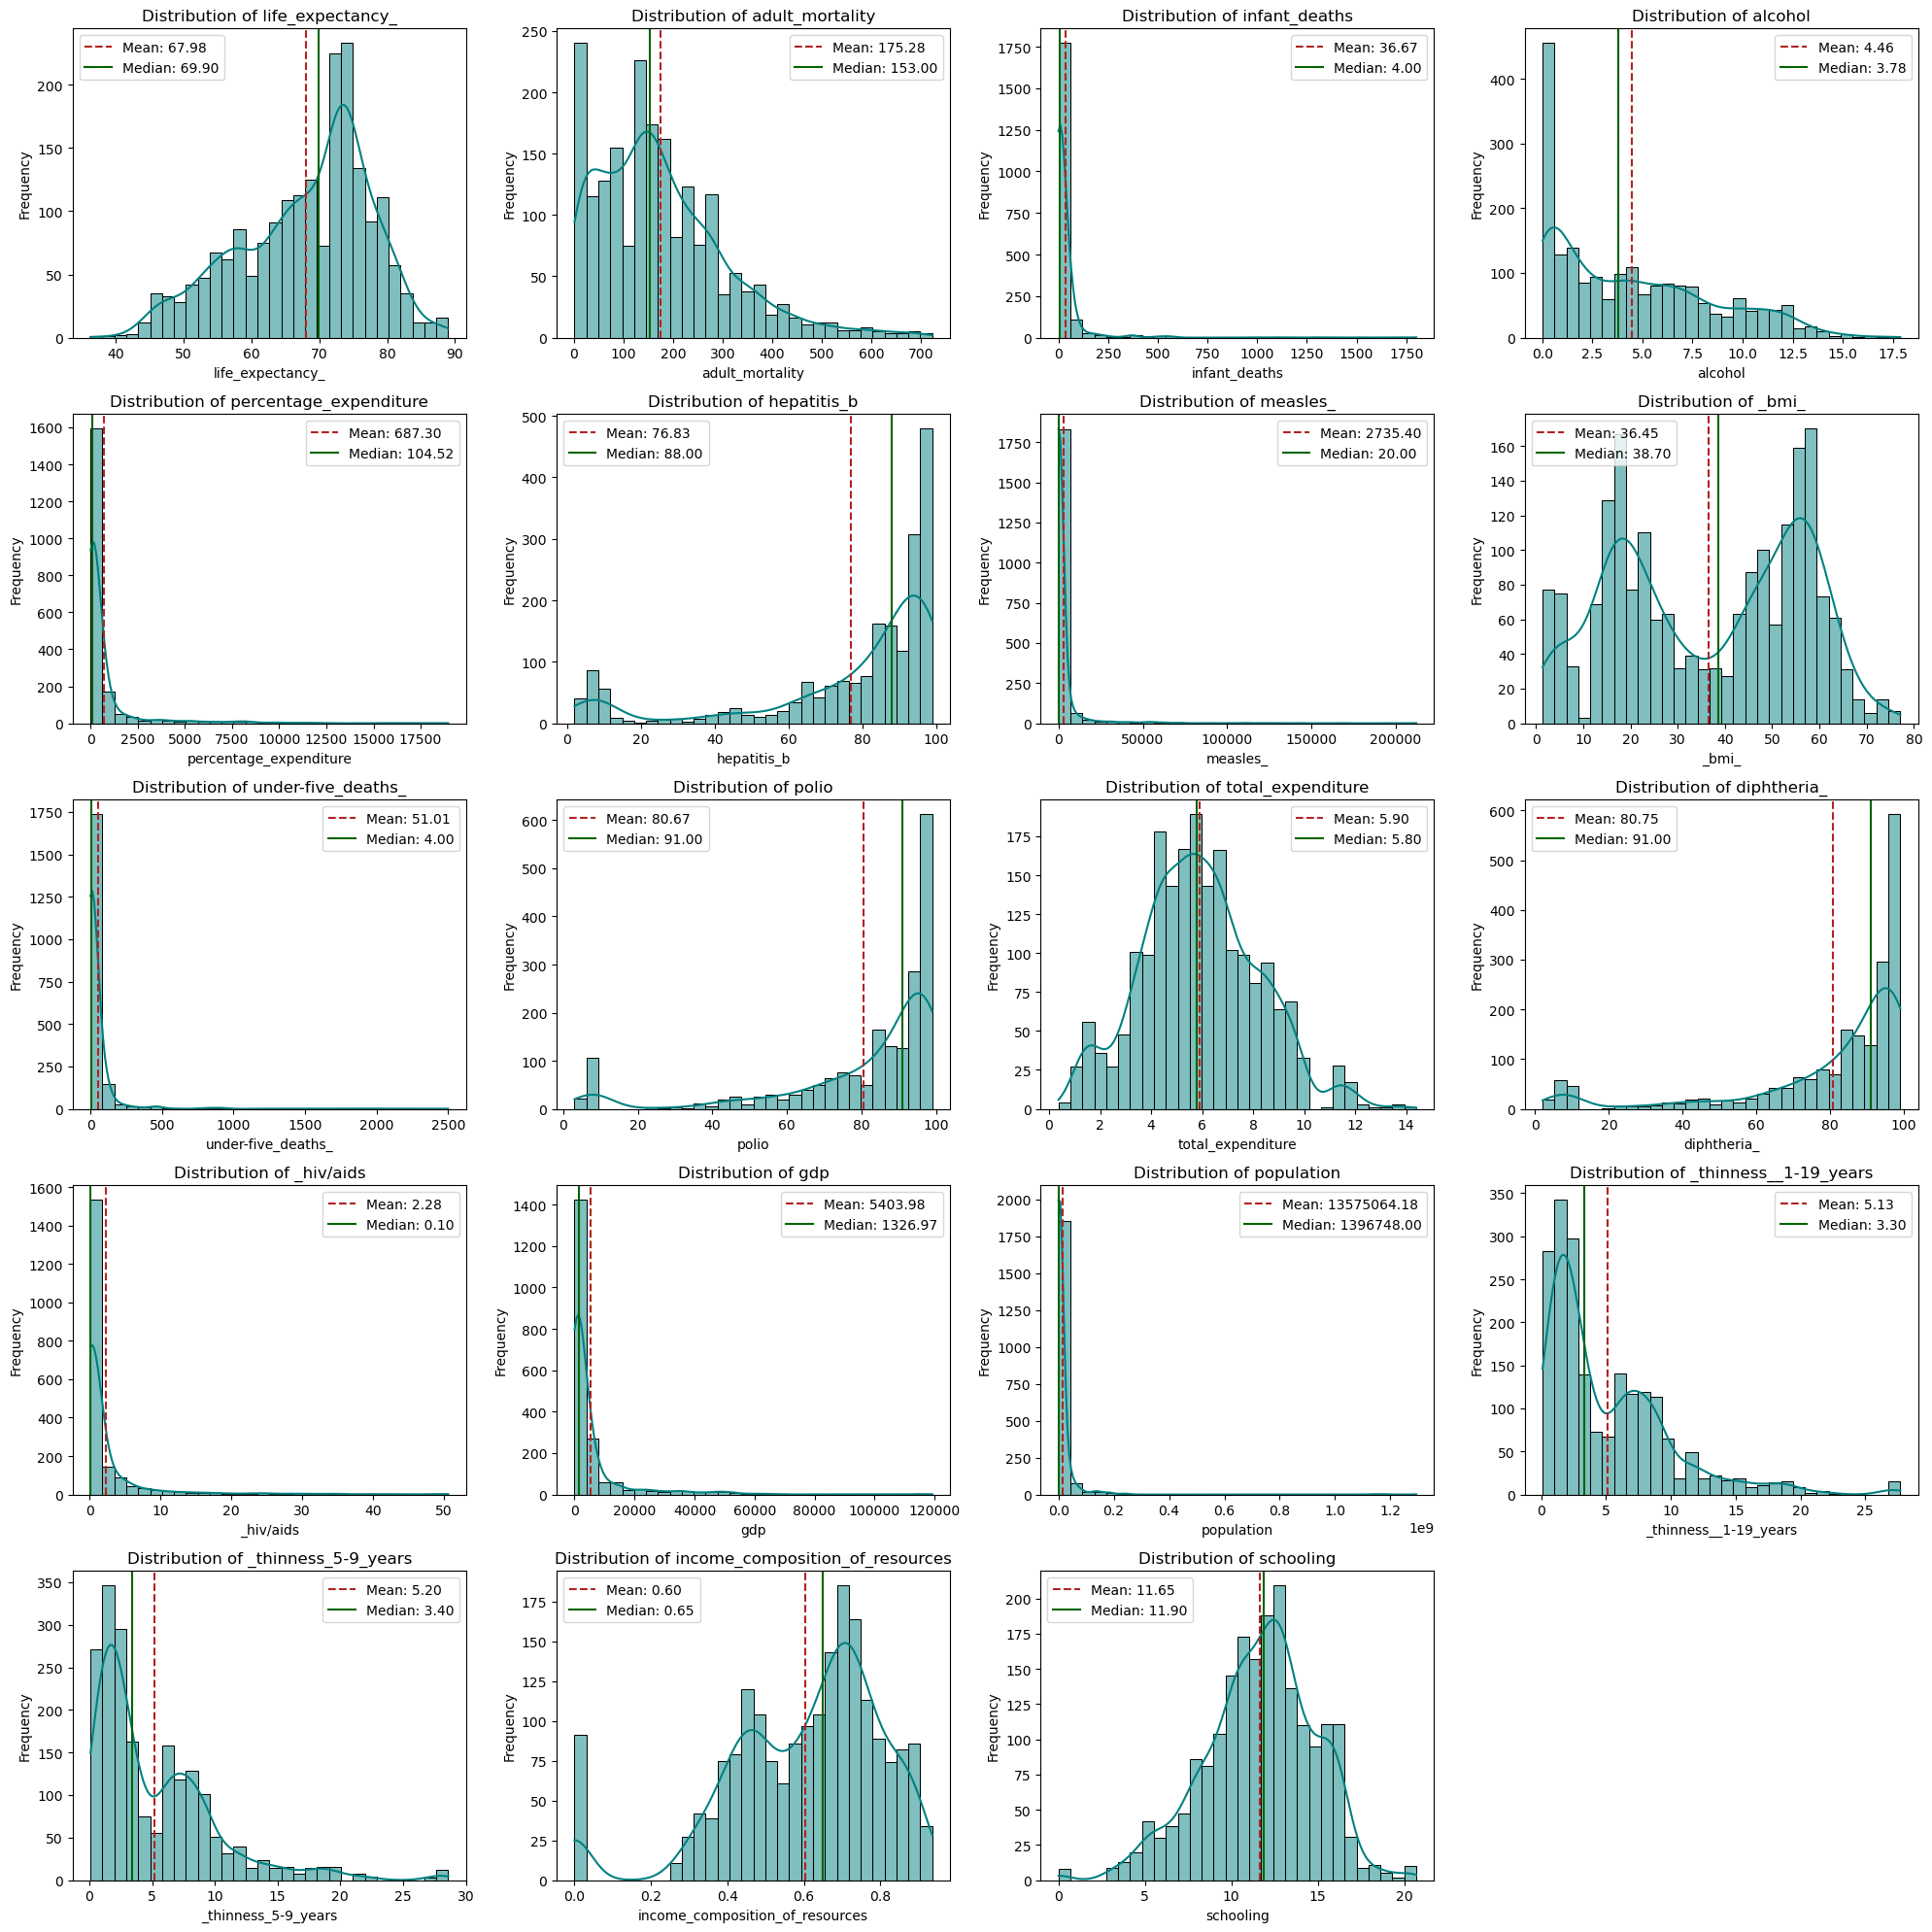

In [26]:
import math
plot_distributions(Expectancy.drop('year', axis = 1))

On average, people could expect to live up to about 68 years, though this varied dramatically, with some fortunate enough to reach nearly 89, while others barely made it past 36. Adult mortality rates painted a stark picture, with about 175 out of every 1,000 adults passing away each year. In some places, the number was as low as 1, while in others, it soared to 723. Infant mortality was also a pressing issue, with an average of 36 total infant deaths per country, though this number could be as high as 1,800 in certain regions.

Alcohol consumption showed that some communities averaged 4.46 liters per person per year, while others indulged quite a bit more, reaching up to 17.5 liters. Health expenditure (in absolute terms, not a percentage) averaged around 685 (possibly dollars per capita), sometimes reaching as high as 18,961. Immunization efforts varied, with about 77% of people receiving the Hepatitis B vaccine and 81% being immunized against Polio and Diphtheria. Despite these efforts, diseases like measles still affected about 2,730 people on average (total cases), although in some places, the number was astonishingly higher, reaching hundreds of thousands.

In terms of economic health, the average GDP per capita was around 5,392 USD, though some nations thrived with much higher figures, while others struggled with significantly lower income levels. On average, nations had a population of around 13.58 million, ranging from small communities of thousands to bustling countries with over a billion residents. The story of thinness showed that around 5% of children aged 1-19 and 5-9 years old were classified as thin. Income composition, scored on a scale from 0 to 1, averaged at 0.60, indicating the varying availability and distribution of resources. Lastly, education flourished to different extents, with people spending an average of about 12 years in school, though this ranged from 1 to 20 years depending on the region.

In [27]:
def winsorize(Expectancy, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_limit = Expectancy[column].quantile(lower_percentile)
    upper_limit = Expectancy[column].quantile(upper_percentile)
    Expectancy[column] = np.clip(Expectancy[column], lower_limit, upper_limit)
    return Expectancy

# Select numerical columns
numerical_cols = Expectancy.drop('year', axis = 1).select_dtypes(include=np.number).columns

# Apply Winsorization to each numerical column
for col in numerical_cols:
    Expectancy = winsorize(Expectancy, col)

In [28]:
Expectancy[['year' , 'status']].astype('category').describe()

,year,status
count,1981,1981
unique,16,2
top,2004,Developing
freq,133,1696


In [29]:
status_counts = Expectancy['status'].value_counts().reset_index()
status_counts.columns = ['status', 'count']
status_counts

,status,count
0,Developing,1696
1,Developed,285


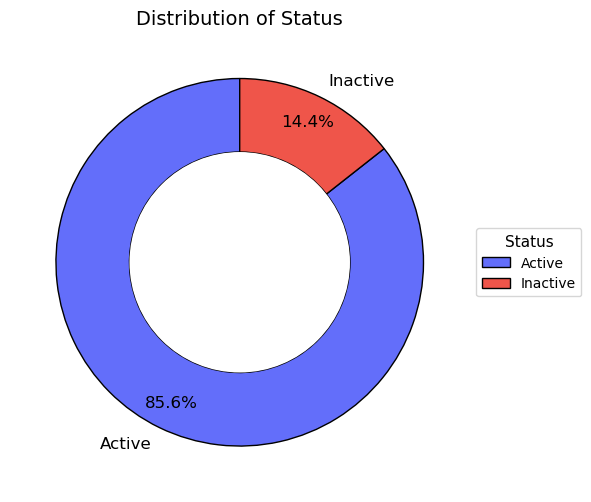

In [30]:
sizes = status_counts['count']
colors = ['#636EFA', '#EF554A']
labels = ['Active', 'Inactive'] 

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='black'),
    autopct='%1.1f%%',
    pctdistance=0.85,
    textprops={'fontsize': 12}
)

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)

ax.set_title('Distribution of Status', fontsize=14)
ax.legend(wedges, labels, title="Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10, title_fontsize=11)

# Improve layout
plt.tight_layout()
plt.show()

Predominance of Developing Countries:

Count: 1702

Percentage: 85.7%

Insight: Most countries are still developing.

Smaller Proportion of Developed Countries:

Count: 285

Percentage: 14.3%

Insight: Fewer countries are developed.

In summary, the data reveals that the majority of countries are developing, with substantial opportunities for growth and improvement through targeted policies and international collaboration.

Bivariate Analysis¶

How does healthcare expenditure impact life expectancy?

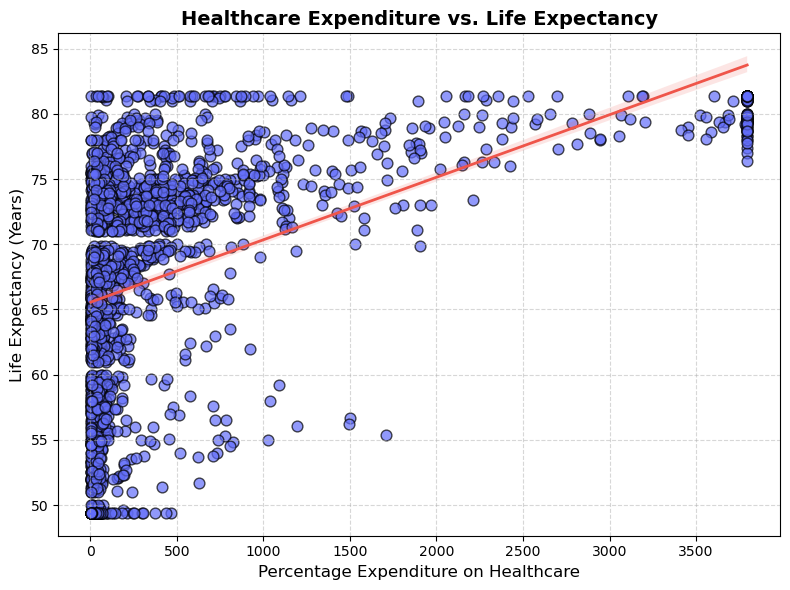

In [31]:
plt.figure(figsize=(8, 6))

sns.regplot(
    data=Expectancy,
    x="percentage_expenditure",
    y="life_expectancy_",
    scatter_kws={'s': 60, 'color': '#636EFA', 'alpha': 0.7, 'edgecolor': 'black'},
    line_kws={'color': '#EF554A', 'linewidth': 2},
)

plt.title("Healthcare Expenditure vs. Life Expectancy", fontsize=14, weight='bold')
plt.xlabel("Percentage Expenditure on Healthcare", fontsize=12)
plt.ylabel("Life Expectancy (Years)", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

In [32]:
correlation, p_value = spearmanr(
    Expectancy["percentage_expenditure"], Expectancy["life_expectancy_"]
)
print(f"Spearman correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman correlation coefficient: 0.6033584263428333
P-value: 9.237465939331756e-197


Correlation:

The value of 0.6013 suggests that, generally, as the healthcare expenditure increases, life expectancy also tends to increase.
P-value:

The p-value is extremely small (1.04481315360701e-195), which is much less than the typical alpha level of 0.05. This implies that the correlation you’ve found is statistically significant, meaning there’s a very low probability that this correlation is due to random chance

What is the relationship between mortality rates (infant/adult) and life expectancy?

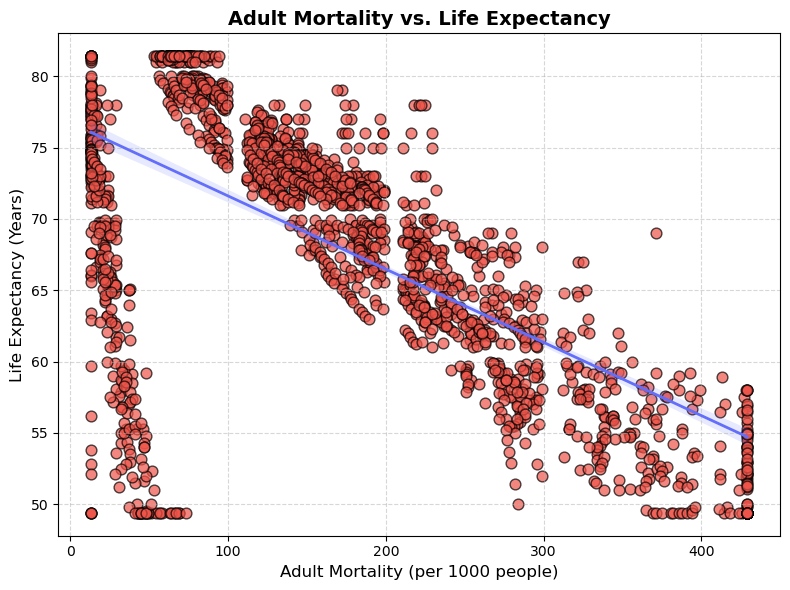

In [33]:
plt.figure(figsize=(8, 6))

sns.regplot(
    data=Expectancy,
    x="adult_mortality",
    y="life_expectancy_",
    scatter_kws={'s': 60, 'color': '#EF554A', 'alpha': 0.7, 'edgecolor': 'black'},
    line_kws={'color': '#636EFA', 'linewidth': 2},
)

plt.title("Adult Mortality vs. Life Expectancy", fontsize=14, weight='bold')
plt.xlabel("Adult Mortality (per 1000 people)", fontsize=12)
plt.ylabel("Life Expectancy (Years)", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

In [34]:
correlation_adult_mortality, p_value_adult_mortality = spearmanr(
    Expectancy["adult_mortality"], Expectancy["life_expectancy_"]
)
print(f"Spearman correlation (Adult Mortality): {correlation_adult_mortality}")
print(f"P-value (Adult Mortality): {p_value_adult_mortality}")

Spearman correlation (Adult Mortality): -0.6171623891678835
P-value (Adult Mortality): 2.61559414807925e-208


Correlation: The negative value of -0.6177 suggests a moderately strong negative correlation. This means that as adult mortality rates increase, life expectancy tends to decrease.

P-value: The very small p-valueindicates that this negative correlation is statistically significant, meaning it’s unlikely to have occurred by random chance.

Overall, this highlights the significant impact of adult mortality on life expectancy. The negative correlation and high statistical significance underscore the importance of addressing factors contributing to adult mortality to improve life expectancy.

Does GDP correlate positively with life expectancy?¶


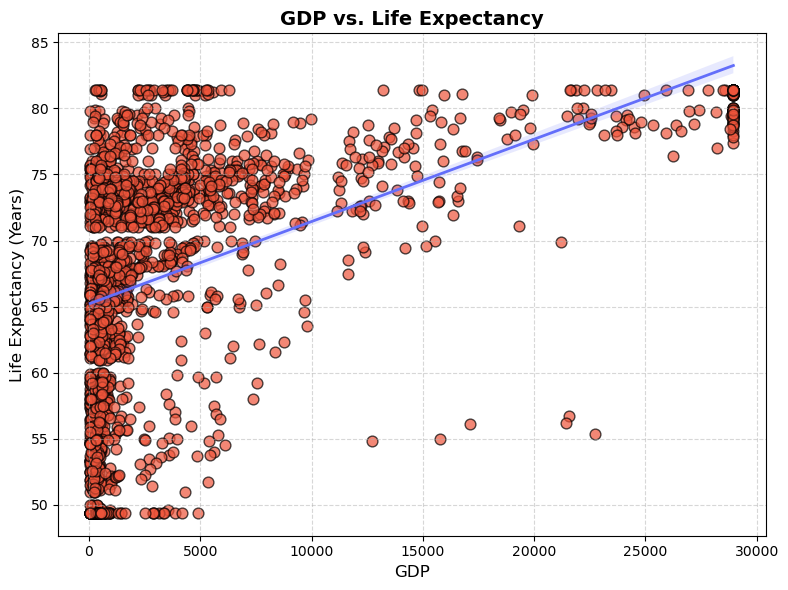

In [35]:
plt.figure(figsize=(8, 6))

sns.regplot(
    data=Expectancy,
    x="gdp",
    y="life_expectancy_",
    scatter_kws={'s': 60, 'color': '#EF553B', 'alpha': 0.7, 'edgecolor': 'black'},
    line_kws={'color': '#636EFA', 'linewidth': 2},
)

plt.title("GDP vs. Life Expectancy", fontsize=14, weight='bold')
plt.xlabel("GDP", fontsize=12)
plt.ylabel("Life Expectancy (Years)", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [36]:
correlation, p_value = spearmanr(Expectancy["gdp"], Expectancy["life_expectancy_"])
print(f"Spearman correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman correlation coefficient: 0.6029257940899813
P-value: 2.0814480328209039e-196


Key insights:

Moderate Positive Correlation: The Spearman correlation coefficient is approximately 0.6031, indicating a moderately strong positive relationship. As GDP increases, life expectancy also tends to increase.

Statistical Significance: The extremely small p-value (3.610373508944555e-197) suggests that this correlation is statistically significant, meaning it’s unlikely to have occurred by random chance.

Higher GDP often translates to better access to healthcare, nutrition, and overall living conditions, leading to longer life expectancy.

In summary, the analysis underscores the importance of economic prosperity for improving public health outcomes.

How does alcohol consumption affect life expectancy?


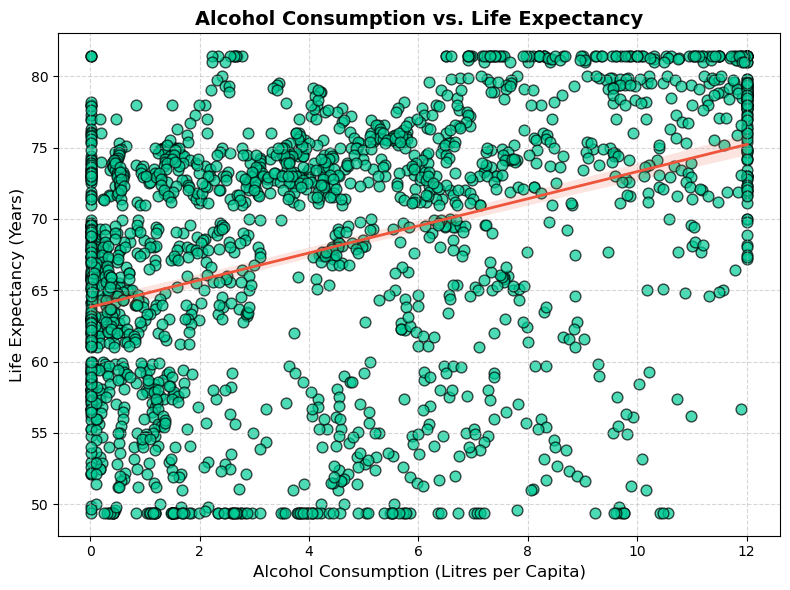

In [37]:
plt.figure(figsize=(8, 6))

sns.regplot(
    data=Expectancy,
    x="alcohol",
    y="life_expectancy_",
    scatter_kws={'s': 60, 'color': '#00CC96', 'alpha': 0.7, 'edgecolor': 'black'},
    line_kws={'color': '#EF553B', 'linewidth': 2},
)

plt.title("Alcohol Consumption vs. Life Expectancy", fontsize=14, weight='bold')
plt.xlabel("Alcohol Consumption (Litres per Capita)", fontsize=12)
plt.ylabel("Life Expectancy (Years)", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Data Distribution:

The data points are scattered but generally follow the upward trend, reinforcing the positive correlation.

    
    Does higher schooling improve life expectancy?

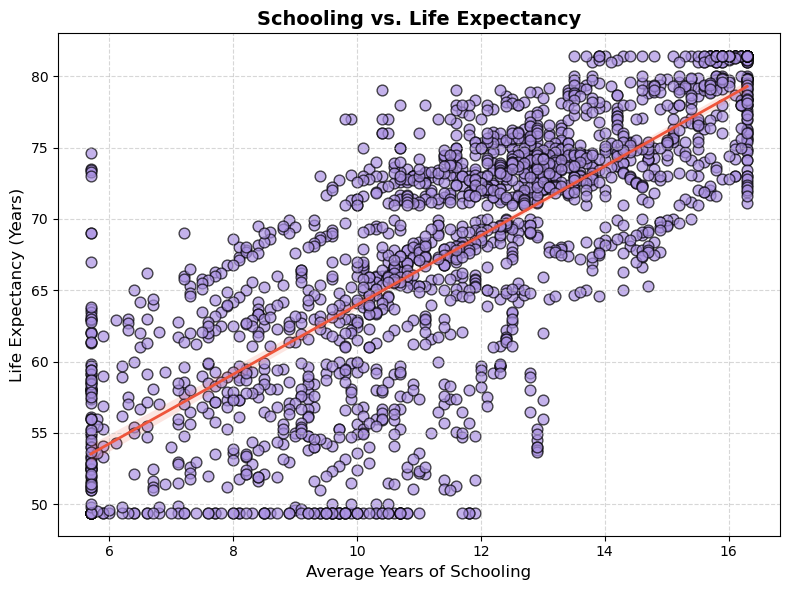

In [38]:
plt.figure(figsize=(8, 6))

sns.regplot(
    data=Expectancy,
    x="schooling",
    y="life_expectancy_",
    scatter_kws={'s': 60, 'color': '#AB92E3', 'alpha': 0.7, 'edgecolor': 'black'},
    line_kws={'color': '#EF553B', 'linewidth': 2},
)

plt.title("Schooling vs. Life Expectancy", fontsize=14, weight='bold')
plt.xlabel("Average Years of Schooling", fontsize=12)
plt.ylabel("Life Expectancy (Years)", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [39]:
correlation, p_value = spearmanr(Expectancy["schooling"], Expectancy["life_expectancy_"])
print(f"Spearman correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman correlation coefficient: 0.8050999682679161
P-value: 0.0


Brief Insight:

Strong Positive Correlation: The scatter plot shows that more years of schooling are associated with higher life expectancy.

Statistical Significance: The Spearman correlation coefficient is 0.8037, with a p-value of 0.0, indicating a strong and statistically significant relationship.

In summary, higher education levels are linked to longer life expectancy.

What is the effect of immunization coverage on life expectancy?

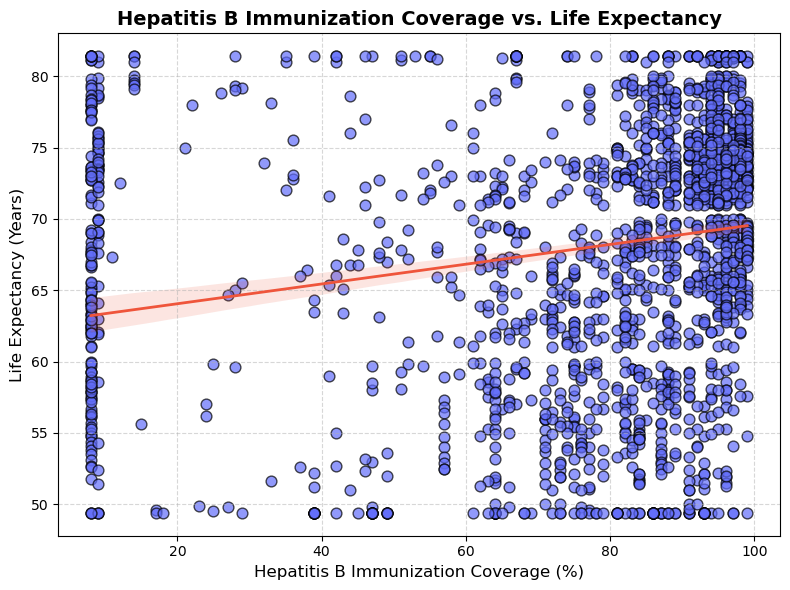

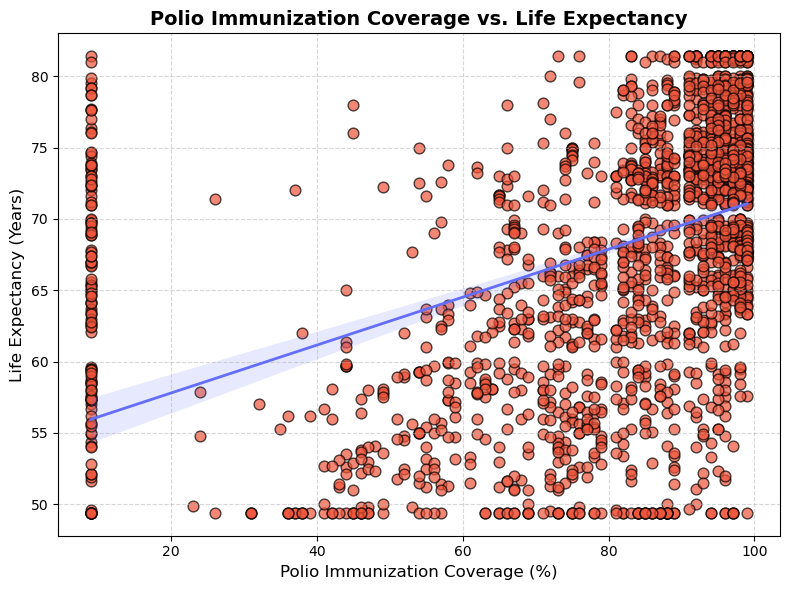

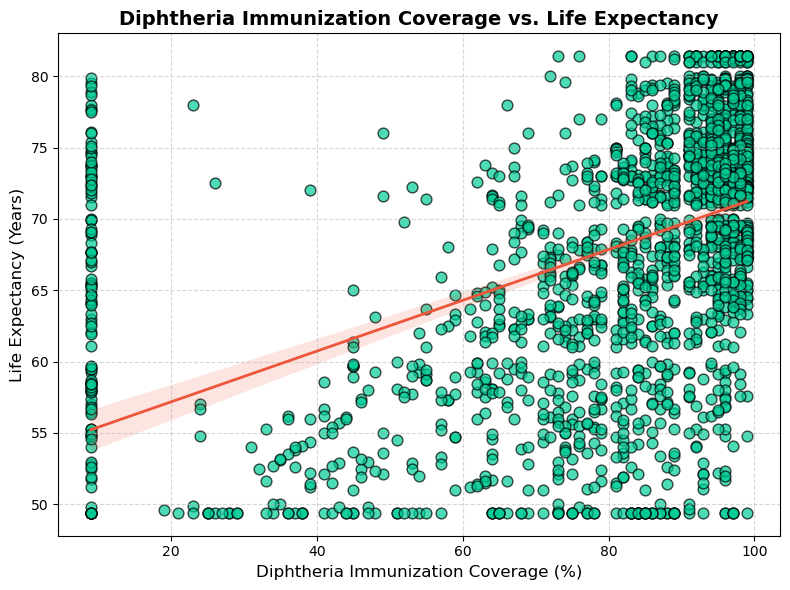

In [40]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=Expectancy,
    x="hepatitis_b",
    y="life_expectancy_",
    scatter_kws={'s': 60, 'color': '#636EFA', 'alpha': 0.7, 'edgecolor': 'black'},
    line_kws={'color': '#EF553B', 'linewidth': 2},
)

plt.title("Hepatitis B Immunization Coverage vs. Life Expectancy", fontsize=14, weight='bold')
plt.xlabel("Hepatitis B Immunization Coverage (%)", fontsize=12)
plt.ylabel("Life Expectancy (Years)", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(
    data=Expectancy,
    x="polio",
    y="life_expectancy_",
    scatter_kws={'s': 60, 'color': '#EF553B', 'alpha': 0.7, 'edgecolor': 'black'},
    line_kws={'color': '#636EFA', 'linewidth': 2},
)

plt.title("Polio Immunization Coverage vs. Life Expectancy", fontsize=14, weight='bold')
plt.xlabel("Polio Immunization Coverage (%)", fontsize=12)
plt.ylabel("Life Expectancy (Years)", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(
    data=Expectancy,
    x="diphtheria_",
    y="life_expectancy_",
    scatter_kws={'s': 60, 'color': '#00CC96', 'alpha': 0.7, 'edgecolor': 'black'},
    line_kws={'color': '#EF553B', 'linewidth': 2},
)

plt.title("Diphtheria Immunization Coverage vs. Life Expectancy", fontsize=14, weight='bold')
plt.xlabel("Diphtheria Immunization Coverage (%)", fontsize=12)
plt.ylabel("Life Expectancy (Years)", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [41]:
# Hepatitis B
correlation_hepatitis_b, p_value_hepatitis_b = spearmanr(
    Expectancy["hepatitis_b"], Expectancy["life_expectancy_"]
)
print(f"Spearman correlation (Hepatitis B): {correlation_hepatitis_b}")
print(f"P-value (Hepatitis B): {p_value_hepatitis_b}")

# Polio
correlation_polio, p_value_polio = spearmanr(Expectancy["polio"],Expectancy["life_expectancy_"])
print(f"Spearman correlation (Polio): {correlation_polio}")
print(f"P-value (Polio): {p_value_polio}")

# Diphtheria
correlation_diphtheria, p_value_diphtheria = spearmanr(
    Expectancy["diphtheria_"], Expectancy["life_expectancy_"]
)
print(f"Spearman correlation (Diphtheria): {correlation_diphtheria}")
print(f"P-value (Diphtheria): {p_value_diphtheria}")


Spearman correlation (Hepatitis B): 0.32617286051403976
P-value (Hepatitis B): 2.511692382578847e-50
Spearman correlation (Polio): 0.5322804238975984
P-value (Polio): 2.343525435262015e-145
Spearman correlation (Diphtheria): 0.5455009305105774
P-value (Diphtheria): 5.3616233276786905e-154


Effect of Immunization Coverage on Life Expectancy¶
Hepatitis B:

Correlation Coefficient: 0.3242
P-value: 7.6238e-50
Insight: There's a weak positive correlation between Hepatitis B immunization coverage and life expectancy. The relationship is statistically significant.
Polio:

Correlation Coefficient: 0.5315
P-value: 2.6795e-145
Insight: There's a moderate positive correlation between Polio immunization coverage and life expectancy. The relationship is statistically significant.
Diphtheria:

Correlation Coefficient: 0.5449
P-value: 4.8933e-154
Insight: There's a moderate positive correlation between Diphtheria immunization coverage and life expectancy. The relationship is statistically significant.
Conclusion:
Higher immunization coverage for Hepatitis B, Polio, and Diphtheria is associated with higher life expectancy. The statistical significance of these correlations underscores the importance of immunization programs in improving public health and increasing life expectancy.

let's explore the relationship between status and Life Expectancy.

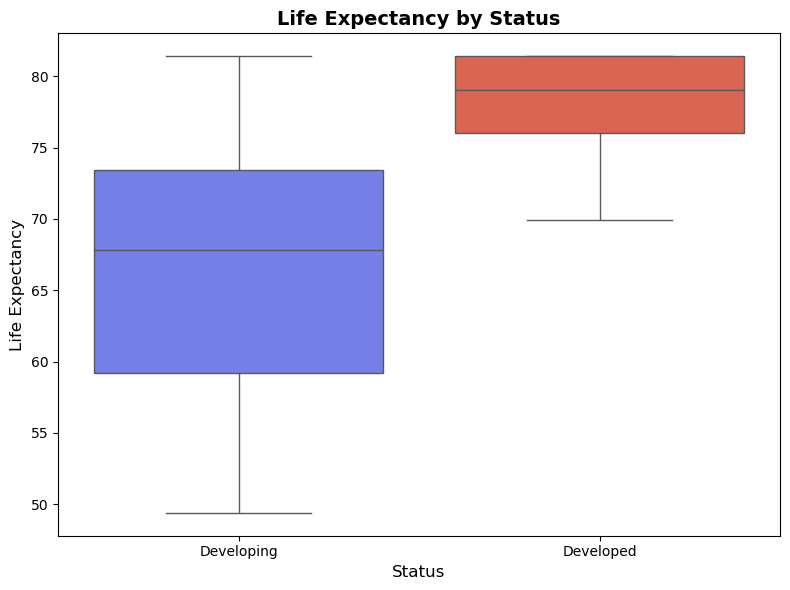

In [42]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=Expectancy,
    x="status",
    y="life_expectancy_",
    palette=["#636EFA", "#EF553B"]
)

plt.title("Life Expectancy by Status", fontsize=14, weight='bold')
plt.xlabel("Status", fontsize=12)
plt.ylabel("Life Expectancy", fontsize=12)

plt.tight_layout()
plt.show()


In [43]:
developed_data = Expectancy[Expectancy["status"] == "Developed"]["life_expectancy_"]
developing_data = Expectancy[Expectancy["status"] == "Developing"]["life_expectancy_"]

t_statistic, p_value = ttest_ind(developed_data, developing_data)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 22.72684411640532
P-value: 8.688290064666588e-102


Conclusion from the Box Plot and T-test Results¶
The box plot and t-test results collectively provide insights into life expectancy differences between developed and developing countries:

From the Box Plot:
Higher Life Expectancy in Developed Countries: The median life expectancy for developed countries is around 75 years, while for developing countries, it is around 65 years.
Variability: Developing countries show more variability in life expectancy compared to developed countries.
From the T-test Results:
T-statistic: 22.7286
P-value: 7.8094e-102
Interpretation:
The extremely high t-statistic and the very small p-value indicate that the difference in life expectancy between developed and developing countries is statistically significant. This means that the observed difference is unlikely to have occurred by random chance.

Overall Conclusion:
Developed countries generally have a higher life expectancy compared to developing countries, and this difference is statistically significant. This highlights the importance of factors such as healthcare, economic stability, and living conditions that contribute to higher life expectancy in developed nations.



Multivariate Analysis



Does better schooling combined with healthcare spending improve life expectancy?

In [44]:
fig = px.scatter(
    data_frame=Expectancy,
    x="schooling",
    y="percentage_expenditure",  # Healthcare spending as a percentage of GDP
    size="population",          # Bubble size represents population
    color="life_expectancy_",    # Bubble color represents life expectancy
    title="Schooling, Healthcare Spending, and Life Expectancy",
    hover_name="country",        # Display country name on hover
    size_max=60,                # Adjust maximum bubble size
    color_continuous_scale="Viridis",  # Use a color scale for life expectancy
)

fig.show(renderer='iframe')

The visualization highlights a positive correlation between schooling years, healthcare expenditure, and life expectancy.
Higher education levels are associated with increased healthcare spending, leading to improved life expectancy.
The color gradient reinforces this trend, showing that countries investing more in education and healthcare tend to have better health outcomes.
Population size variations indicate diverse investment patterns, influenced by economic and demographic factors.

Does higher GDP and healthcare expenditure together lead to longer life expectancy?

In [45]:
selected_data = Expectancy[["gdp", "percentage_expenditure", "life_expectancy_"]]

# Calculate correlation matrix
correlation_matrix = selected_data.corr()  


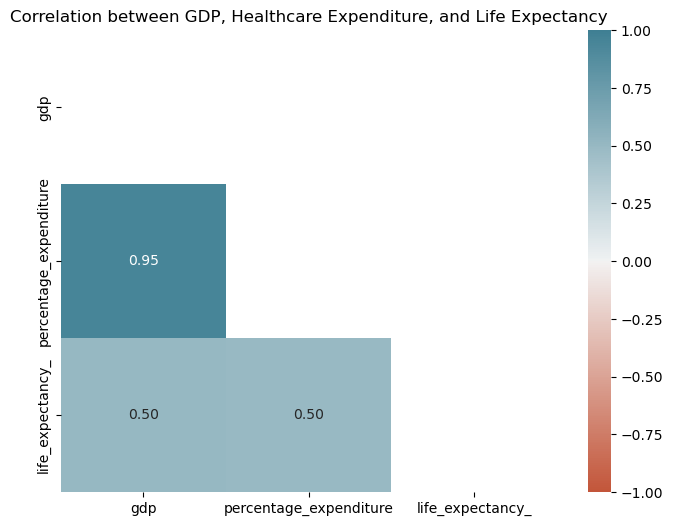

In [46]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(20, 220, as_cmap=True),
    annot=True,
    fmt=".2f",
    mask=mask,
)

plt.title("Correlation between GDP, Healthcare Expenditure, and Life Expectancy")
plt.show()

There is a strong positive correlation (0.95) between GDP and healthcare expenditure, indicating that higher GDP countries allocate more funds to healthcare.
Life expectancy has a moderate positive correlation (0.50) with both GDP and healthcare expenditure, suggesting that economic growth and healthcare investment contribute to longer life expectancy.

Model Implementation

Data Preparation

let's encode the status column

In [47]:
label_encoder = LabelEncoder()
Expectancy['status'] = label_encoder.fit_transform(Expectancy['status'])

Separate features and target

In [48]:
X = Expectancy.drop(columns=['country','life_expectancy_', 'year']).values
y = Expectancy['life_expectancy_'].values

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
models = {  
    "LinearRegression": (LinearRegression(), StandardScaler()),
    "Ridge": (Ridge(alpha=1.0), StandardScaler()),
    "Lasso": (Lasso(alpha=0.1), StandardScaler()),
    "SVR": (SVR(kernel='rbf'), StandardScaler()),
    "DecisionTree": (DecisionTreeRegressor(), MinMaxScaler()),
    "RandomForest": (RandomForestRegressor(), MinMaxScaler()),
    "GradientBoosting": (GradientBoostingRegressor(), MinMaxScaler()),
    "KNN": (KNeighborsRegressor(n_neighbors=5), StandardScaler()),
    "XGBoost": (XGBRegressor(), MinMaxScaler())
}

Hyperparameter grid for each model


In [51]:
param_grid = {
    "LinearRegression": {},
    "Ridge": {'model__alpha': [0.01, 0.1, 1, 10, 100]},  # Regularization strength
    "Lasso": {'model__alpha': [0.001, 0.01, 0.1, 1, 10]},  # Regularization strength
    "SVR": {
        'model__C': [0.1, 1, 10, 100],  # Regularization parameter
        'model__epsilon': [0.01, 0.1, 0.2]  # Defines tolerance margin for regression
    },
    "DecisionTree": {
        'model__max_depth': [None, 5, 10, 20],  # Limits overfitting
        'model__min_samples_split': [2, 5, 10]  # Minimum samples required to split a node
    },
    "RandomForest": {
        'model__n_estimators': [50, 100, 200],  # Number of trees
        'model__max_depth': [None, 5, 10],  # Limits overfitting
        'model__min_samples_split': [2, 5, 10]  # Controls when a node should split
    },
    "GradientBoosting": {
        'model__n_estimators': [50, 100, 200],  # Number of boosting stages
        'model__learning_rate': [0.01, 0.1, 0.2],  # Shrinks contribution of each tree
        'model__max_depth': [3, 5, 10]  # Depth of trees
    },
    "KNN": {'model__n_neighbors': [3, 5, 7, 10], # Number of neighbors
            'model__p': [1, 2]  # Distance metric: 1 for Manhattan, 2 for Euclidean
            },
    "XGBoost": {
        'model__n_estimators': [50, 100, 200],  # Number of boosting rounds
        'model__learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
        'model__max_depth': [3, 5, 10]  # Depth of trees
    }
}

In [52]:
# Store results
results = []

# Training and evaluating models
for name, (model, scaler) in models.items():
    print(f"Training {name}...")

    # Create a pipeline
    pipeline = Pipeline([
        ('scaler', scaler),
        ('model', model)
    ])

    # Grid search with cross-validation
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model evaluation
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Compute metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Append results
    results.append([name, grid_search.best_params_, mae, mse, rmse, r2])

    # Save best model if it's the highest R²
    if r2 == max([r[5] for r in results]):
        best_model_overall = best_model

Training LinearRegression...
Training Ridge...
Training Lasso...
Training SVR...
Training DecisionTree...
Training RandomForest...
Training GradientBoosting...
Training KNN...
Training XGBoost...


In [53]:
results_df = pd.DataFrame(results, columns=["Model", "Best Params", "MAE", "MSE", "RMSE", "R²"])
results_df

,Model,Best Params,MAE,MSE,RMSE,R²
0,LinearRegression,{},2.472,10.794,3.285,0.875
1,Ridge,{'model__alpha': 0.01},2.472,10.793,3.285,0.875
2,Lasso,{'model__alpha': 0.001},2.470,10.784,3.284,0.875
3,SVR,"{'model__C': 100, 'model__epsilon': 0.2}",1.324,4.364,2.089,0.949
4,DecisionTree,"{'model__max_depth': 10, 'model__min_samples_s...",1.614,7.676,2.770,0.911
5,RandomForest,"{'model__max_depth': None, 'model__min_samples...",1.061,3.108,1.763,0.964
6,GradientBoosting,"{'model__learning_rate': 0.1, 'model__max_dept...",1.089,2.927,1.711,0.966
7,KNN,"{'model__n_neighbors': 3, 'model__p': 1}",1.296,4.255,2.063,0.951
8,XGBoost,"{'model__learning_rate': 0.1, 'model__max_dept...",1.114,3.126,1.768,0.964


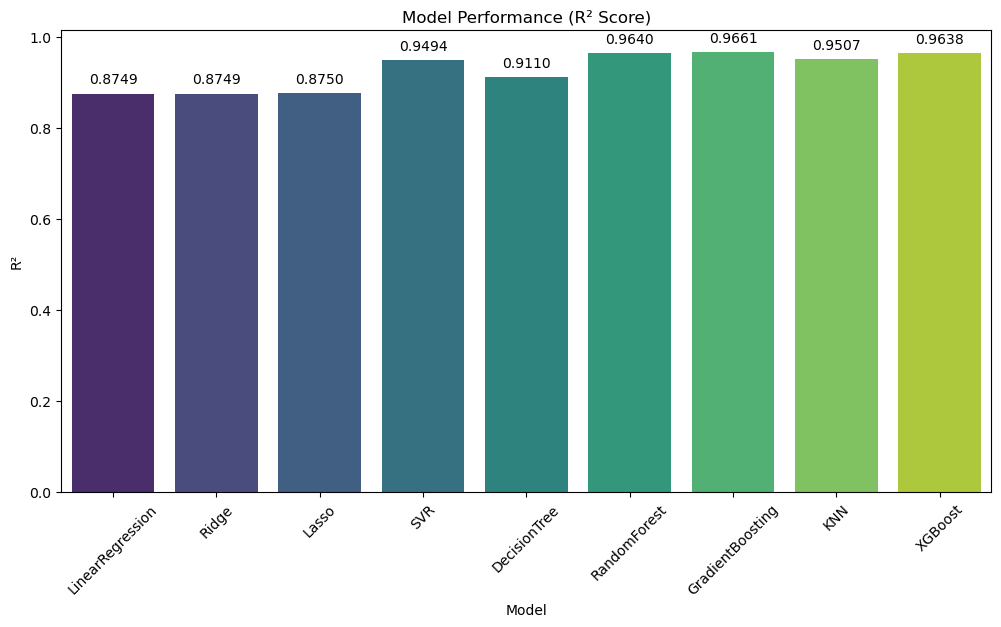

In [54]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Model", y="R²", data=results_df, palette="viridis")
plt.title("Model Performance (R² Score)")
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.4f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),  # Adjust vertical offset of text
        textcoords='offset points'
    )

plt.show()


Save the best model

In [55]:
import joblib
joblib.dump(best_model_overall, "best_model.pkl")

['best_model.pkl']